# Load and explore the nCov2019 dataset (latest data)

In [1]:
ncov_latest_data = catalog.load("raw_ncov_latest_data")
ncov_latest_data

2020-05-04 00:32:00,296 - kedro.io.data_catalog - INFO - Loading data from `raw_ncov_latest_data` (CSVDataSet)...


/anaconda3/envs/inauditus/lib/python3.7/site-packages/kedro/io/data_catalog.py:358: DtypeWarning: Columns (1,2,9,10,12,13,14,15,16,17,19,21,22,23,24,25,26,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  result = func()


,ID,age,sex,city,province,country,latitude,longitude,geo_resolution,date_onset_symptoms,...,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,data_moderator_initials,travel_history_binary
0,000-1-1,NaN,male,Shek Lei,Hong Kong,China,22.365019,114.133808,point,NaN,...,NaN,NaN,Shek Lei,NaN,NaN,Hong Kong,China,8051.0,NaN,NaN
1,000-1-10,78,male,Vo Euganeo,Veneto,Italy,45.297748,11.658382,point,NaN,...,22.02.2020,NaN,Vo' Euganeo,NaN,NaN,Veneto,Italy,8978.0,NaN,NaN
2,000-1-100,61,female,NaN,NaN,Singapore,1.353460,103.815100,admin0,NaN,...,17.02.2020,NaN,NaN,NaN,NaN,NaN,Singapore,201.0,NaN,NaN
3,000-1-1000,NaN,NaN,Zhengzhou City,Henan,China,34.629310,113.468000,admin2,NaN,...,NaN,NaN,NaN,NaN,Zhengzhou City,Henan,China,10115.0,NaN,NaN
4,000-1-10000,NaN,NaN,Pingxiang City,Jiangxi,China,27.513560,113.902900,admin2,NaN,...,NaN,NaN,NaN,NaN,Pingxiang City,Jiangxi,China,7079.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476121,007-99995,NaN,NaN,Trieste,Friuli Venezia Giulia,Italy,45.657570,13.772690,point,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Italy,10797.0,TR,False
476122,007-99996,NaN,NaN,Trieste,Friuli Venezia Giulia,Italy,45.657570,13.772690,point,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Italy,10797.0,TR,False
476123,007-99997,NaN,NaN,Trieste,Friuli Venezia Giulia,Italy,45.657570,13.772690,point,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Italy,10797.0,TR,False
476124,007-99998,NaN,NaN,Trieste,Friuli Venezia Giulia,Italy,45.657570,13.772690,point,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Italy,10797.0,TR,False


In [2]:
ncov_latest_data.dtypes

ID                           object
age                          object
sex                          object
city                         object
province                     object
country                      object
latitude                    float64
longitude                   float64
geo_resolution               object
date_onset_symptoms          object
date_admission_hospital      object
date_confirmation            object
symptoms                     object
lives_in_Wuhan               object
travel_history_dates         object
travel_history_location      object
reported_market_exposure     object
additional_information       object
chronic_disease_binary         bool
chronic_disease              object
source                       object
sequence_available           object
outcome                      object
date_death_or_discharge      object
notes_for_discussion         object
location                     object
admin3                       object
admin2                      

`date_onset_symptoms` and `date_admission_hospital` are too sparse.

In [3]:
ncov_latest_data.date_onset_symptoms.value_counts(dropna=False)

NaN             471869
23.03.2020         140
20.03.2020         132
16.03.2020         116
26.03.2020         113
                 ...  
30.12.2019           1
23.12.2019           1
20.12.2019           1
- 25.02.2020         1
26.11.2020           1
Name: date_onset_symptoms, Length: 106, dtype: int64

In [4]:
ncov_latest_data.date_admission_hospital.value_counts(dropna=False)

NaN           474264
30.01.2020        90
22.01.2020        88
31.01.2020        82
23.01.2020        82
               ...  
16.02.2020         2
31.12.2019         2
06.01.2020         1
01.01.2020         1
10.12.2019         1
Name: date_admission_hospital, Length: 83, dtype: int64

In [5]:
ncov_latest_data.date_confirmation.value_counts(dropna=False)

23.03.2020                 33269
22.03.2020                 28058
26.03.2020                 27984
21.03.2020                 23215
27.03.2020                 21443
                           ...  
12.03.2020-14.03.2020          2
06.03.2020 - 08.03.2020        2
15.01.2020                     2
06.01.2020                     2
16.01.2020                     2
Name: date_confirmation, Length: 129, dtype: int64

## Type date columns

In [6]:
import pandas as pd

for column in ncov_latest_data.columns:
    if column.startswith("date"):
        ncov_latest_data[column] = pd.to_datetime(ncov_latest_data[column], errors="coerce", dayfirst=True)

## Drop rows where confirmation date is after death or discharge date

TODO(deepyaman): Handle cases where confirmation date is after death or discharge date.

In [7]:
ncov_latest_data[ncov_latest_data.date_confirmation > ncov_latest_data.date_death_or_discharge]

,ID,age,sex,city,province,country,latitude,longitude,geo_resolution,date_onset_symptoms,...,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,data_moderator_initials,travel_history_binary
3333,000-1-13,95,female,Macquarie Park,New South Wales,Australia,-33.777200,151.12410,point,NaT,...,2020-03-03,NaN,Macquarie Park,NaN,NaN,New South Wales,Australia,5868.0,NaN,NaN
3889,000-1-135,32,male,Kathmandu,NaN,Nepal,27.717200,85.32400,point,2020-01-09,...,2020-01-17,NaN,Kathmandu,NaN,NaN,Province No.-3,Nepal,4976.0,NaN,NaN
5885,000-1-153,38,NaN,Beijing,Beijing,China,40.185350,116.41510,admin2,NaT,...,2020-02-02,NaN,NaN,NaN,Beijing,Beijing,China,1480.0,NaN,NaN
6437,000-1-158,60,female,Cebu City,Cebu,Philippines,10.378930,123.77630,point,2020-01-22,...,2020-01-30,NaN,Cebu City,NaN,NaN,Cebu,Philippines,2034.0,NaN,NaN
12194,000-1-21,NaN,NaN,Suihua City,Heilongjiang,China,46.900840,126.64870,admin2,NaT,...,2020-01-23,NaN,NaN,NaN,Suihua City,Heilongjiang,China,8388.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203275,005-32,70-79,female,King County,Washington,United States,47.491332,-121.80364,admin2,NaT,...,2020-03-01,NaN,NaN,NaN,King County,Washington,United States,5047.0,NaN,False
212163,005-4,70-79,male,King County,Washington,United States,47.491332,-121.80364,admin2,NaT,...,2020-02-29,NaN,NaN,NaN,King County,Washington,United States,5047.0,NaN,False
219938,005-47,50-59,male,King County,Washington,United States,47.491332,-121.80364,admin2,NaT,...,2020-02-26,NaN,NaN,NaN,King County,Washington,United States,5047.0,NaN,False
221049,005-48,80-89,female,King County,Washington,United States,47.491332,-121.80364,admin2,NaT,...,2020-02-26,NaN,NaN,NaN,King County,Washington,United States,5047.0,NaN,False


In [8]:
ncov_latest_data_filtered = ncov_latest_data[
    ~(ncov_latest_data.date_confirmation > ncov_latest_data.date_death_or_discharge)
    & ncov_latest_data.date_confirmation.notna()
]

# Get data in the right format

In [9]:
start_dates = ncov_latest_data_filtered.date_confirmation
end_dates = ncov_latest_data_filtered.date_death_or_discharge
pd.DataFrame({"start_dates": start_dates, "end_dates": end_dates}).describe()

,start_dates,end_dates
count,471239,393
unique,106,67
top,2020-03-23 00:00:00,2020-02-18 00:00:00
freq,33268,22
first,2020-01-06 00:00:00,2020-01-15 00:00:00
last,2020-04-27 00:00:00,2020-04-05 00:00:00


In [10]:
from datetime import datetime

last_load_version = datetime.strptime(
    catalog.datasets.raw_ncov_latest_data.get_last_load_version(),
    "%Y-%m-%dT%H.%M.%S.%fZ",
)
last_load_version

datetime.datetime(2020, 4, 29, 9, 6, 1)

In [11]:
from lifelines.utils import datetimes_to_durations

T, E = datetimes_to_durations(
    start_dates, end_dates, fill_date=last_load_version, freq="D"
)
pd.DataFrame({"T": T, "E": E})[E]

,T,E
1,1.0,True
2,3.0,True
113,6.0,True
224,17.0,True
335,15.0,True
...,...,...
206500,1.0,True
215922,19.0,True
218404,0.0,True
227523,1.0,True


In [12]:
# pd.DataFrame({"T": T, "E": E}).groupby("E")["T"].value_counts()
with pd.option_context("display.max_rows", None):
    print(pd.DataFrame({"T": T, "E": E}).groupby("E")["T"].value_counts())

E      T    
False  37.0     33266
       38.0     28051
       34.0     27978
       39.0     23196
       33.0     21440
       36.0     19983
       35.0     17297
       40.0     17171
       32.0     17049
       41.0     13938
       31.0     11396
       42.0     11318
       43.0      9022
       19.0      8245
       24.0      7010
       17.0      6870
       18.0      6730
       21.0      6632
       20.0      6628
       46.0      6558
       27.0      6414
       45.0      6386
       28.0      6169
       26.0      6040
       25.0      5860
       44.0      5819
       29.0      5527
       30.0      5238
       22.0      4886
       23.0      4826
       12.0      4781
       48.0      4738
       47.0      4305
       13.0      4261
       86.0      4065
       14.0      4049
       49.0      3821
       83.0      3657
       88.0      3339
       15.0      3290
       81.0      3183
       16.0      2978
       89.0      2954
       55.0      2825
       91.0      27

# Analyze survival!

In [13]:
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()
kmf.fit(T, E)

2020-05-04 00:32:03,243 - numexpr.utils - INFO - NumExpr defaulting to 8 threads.


<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 471239 total observations, 470846 right-censored observations>

In [14]:
kmf.survival_function_

,KM_estimate
timeline,
0.0,0.999932
1.0,0.999875
2.0,0.999839
3.0,0.999796
4.0,0.999771
...,...
101.0,0.999131
102.0,0.999131
103.0,0.999131


In [15]:
kmf.cumulative_density_

,KM_estimate
timeline,
0.0,0.000068
1.0,0.000125
2.0,0.000161
3.0,0.000204
4.0,0.000229
...,...
101.0,0.000869
102.0,0.000869
103.0,0.000869


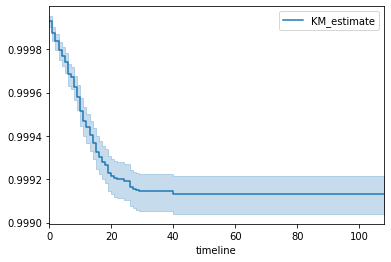

In [16]:
kmf.plot_survival_function()

/anaconda3/envs/inauditus/lib/python3.7/site-packages/lifelines/fitters/__init__.py:941: StatisticalWarning: The diagonal of the variance_matrix_ has negative values. This could be a problem with GeneralizedGammaFitter's fit to the data.

It's advisable to not trust the variances reported, and to be suspicious of the fitted parameters too. Perform plots of the cumulative hazard to help understand the latter's bias.

To fix this, try specifying an `initial_point` kwarg in `fit`.

  warnings.warn(warning_text, utils.StatisticalWarning)
/anaconda3/envs/inauditus/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/anaconda3/envs/inauditus/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colN

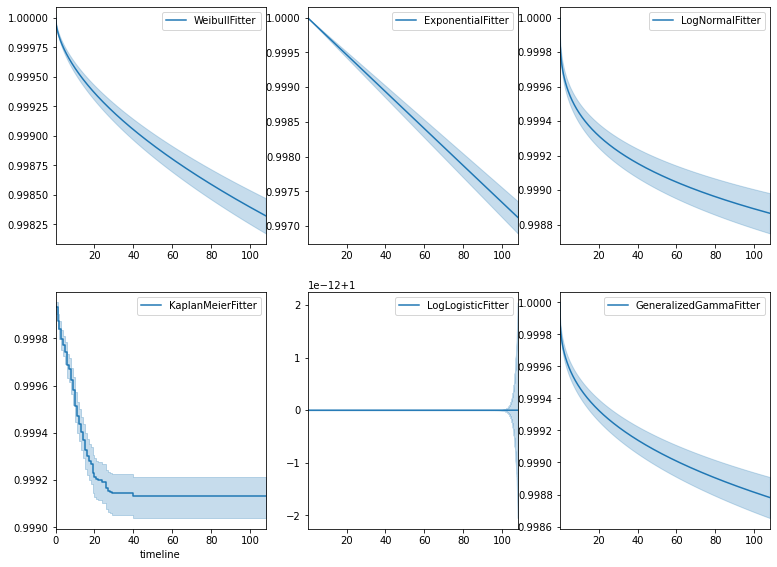

In [17]:
import matplotlib.pyplot as plt
from lifelines import *

fig, axes = plt.subplots(2, 3, figsize=(12.8, 9.6))

kmf = KaplanMeierFitter().fit(T, E, label='KaplanMeierFitter')

T[T == 0] += 1e-6  # Other models do not allow for non-positive durations; add a small positive value to zero elements.

wbf = WeibullFitter().fit(T, E, label='WeibullFitter')
exf = ExponentialFitter().fit(T, E, label='ExponentialFitter')
lnf = LogNormalFitter().fit(T, E, label='LogNormalFitter')
llf = LogLogisticFitter().fit(T, E, label='LogLogisticFitter')
ggf = GeneralizedGammaFitter().fit(T, E, label='GeneralizedGammaFitter')

wbf.plot_survival_function(ax=axes[0][0])
exf.plot_survival_function(ax=axes[0][1])
lnf.plot_survival_function(ax=axes[0][2])
kmf.plot_survival_function(ax=axes[1][0])
llf.plot_survival_function(ax=axes[1][1])
ggf.plot_survival_function(ax=axes[1][2])